In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train.dtype

dtype('uint8')

# Preprocess data 

In [6]:
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
import matplotlib.pyplot as plt

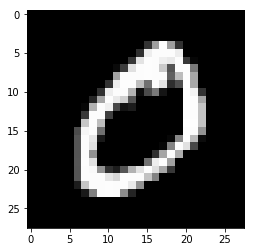

In [10]:
plt.imshow(x_train[1].reshape(28, 28), cmap='gray')

# Model 

In [11]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.regularizers import l2

In [12]:
from functools import partial

In [13]:
my_layer = partial(Dense, activation='elu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001))

In [14]:
def simple_autoencoder(n_inputs):
    n_hidden1 = 300
    n_bottleneck = 150
    n_hidden2 = n_hidden1
    n_outputs = n_inputs
    
    x_input = Input(shape=(n_inputs,), name='input')
    hidden1 = my_layer(n_hidden1, name='hidden1')(x_input)
    bottleneck = my_layer(n_bottleneck, name='bottleneck')(hidden1)
    hidden2 = my_layer(n_hidden2, name='hidden2')(bottleneck)
    output = my_layer(n_outputs, name='output')(hidden2)
    
    model = Model(x_input, output, name='simple autoencoder')
    
    return model

In [15]:
model = simple_autoencoder(28*28)

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
bottleneck (Dense)           (None, 150)               45150     
_________________________________________________________________
hidden2 (Dense)              (None, 300)               45300     
_________________________________________________________________
output (Dense)               (None, 784)               235984    
Total params: 561,934
Trainable params: 561,934
Non-trainable params: 0
_________________________________________________________________


# Training 

In [17]:
model.compile('adam', loss='mean_squared_error')

In [18]:
model.fit(x_train, x_train, batch_size=256, validation_split=0.1, epochs=40)

Train on 54000 samples, validate on 6000 samples
Epoch 1/40
54000/54000 [==============================] - 3s 56us/step - loss: 0.2339 - val_loss: 0.1164
Epoch 2/40
54000/54000 [==============================] - 1s 12us/step - loss: 0.0786 - val_loss: 0.0549
Epoch 3/40
54000/54000 [==============================] - 1s 11us/step - loss: 0.0456 - val_loss: 0.0392
Epoch 4/40
54000/54000 [==============================] - 1s 12us/step - loss: 0.0362 - val_loss: 0.0339
Epoch 5/40
54000/54000 [==============================] - 1s 12us/step - loss: 0.0328 - val_loss: 0.0319
Epoch 6/40
54000/54000 [==============================] - 1s 12us/step - loss: 0.0315 - val_loss: 0.0311
Epoch 7/40
54000/54000 [==============================] - 1s 12us/step - loss: 0.0309 - val_loss: 0.0307
Epoch 8/40
54000/54000 [==============================] - 1s 12us/step - loss: 0.0307 - val_loss: 0.0306
Epoch 9/40
54000/54000 [==============================] - 1s 11us/step - loss: 0.0306 - val_loss: 0.0305
Epoch 

# Evaluate 

In [19]:
pred = model.predict(x_test)

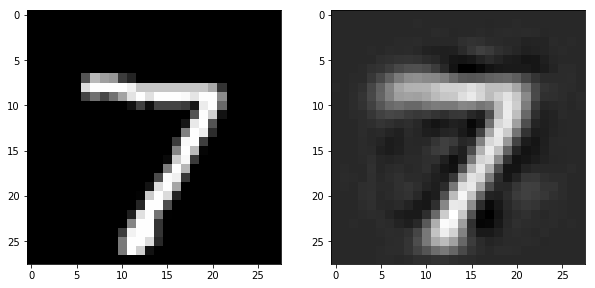

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(x_test[0].reshape(28, 28), cmap='gray')
ax[1].imshow(pred[0].reshape(28, 28), cmap='gray')

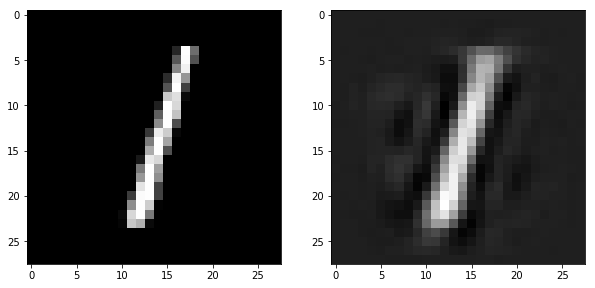

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(x_test[2].reshape(28, 28), cmap='gray')
ax[1].imshow(pred[2].reshape(28, 28), cmap='gray')